# Part 2, Lab #3: Bag of Visual Words

Ke Xu 3190110360

### Due April 13th, 2023 11:59 PM CST
#### Logistics and Lab Submission
See the **BlackBoard**.
#### What You Will Need To Know For This Lab

This lab covers:

- Learning Bag of Visual Features.

The submission procedure is provided below:
- You will be provided with a Jupyter Notebook for this lab where you need to implement the provided functions as needed for each question. Follow the instructions provided in this Jupyter Notebook (.ipynb) to implement the required functions. 
- Upload the **PDF** (screen shot) file of your Jupyter Notebook (.ipynb file).
- Your grades and feedbacks will appear on BlackBoard. You will have a chance to re-submit your code, only if you have *reasonable* submissions before the deadline (i.e. not an empty script).

# Problem 1: Training

1. import packages.

In [1]:
!pip install scikit-learn
!pip install matplotlib

In [2]:
import cv2
import numpy as np 
import os
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics.pairwise import chi2_kernel
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

2. Define the function before the training.

In [3]:
def getFiles(train, path):
    images = []
    count = 0
    for folder in os.listdir(path):
        for file in  os.listdir(os.path.join(path, folder)):
            images.append(os.path.join(path, os.path.join(folder, file)))

    if(train is True):
        np.random.shuffle(images)
    
    return images

def getDescriptors(sift, img):
    kp, des = sift.detectAndCompute(img, None)
    return des

def readImage(img_path):
    img = cv2.imread(img_path, 0)
    return cv2.resize(img,(150,150))

def vstackDescriptors(descriptor_list):
    descriptors = np.array(descriptor_list[0])
    for descriptor in descriptor_list[1:]:
        descriptors = np.vstack((descriptors, descriptor)) 

    return descriptors

def normalizeFeatures(scale, features):
    return scale.transform(features)

def plotHistogram(im_features, no_clusters):
    x_scalar = np.arange(no_clusters)
    y_scalar = np.array([abs(np.sum(im_features[:,h], dtype=np.int32)) for h in range(no_clusters)])

    plt.bar(x_scalar, y_scalar)
    plt.xlabel("Visual Word Index")
    plt.ylabel("Frequency")
    plt.title("Complete Vocabulary Generated")
    plt.xticks(x_scalar + 0.4, x_scalar)
    plt.show()

def svcParamSelection(X, y, kernel, nfolds):
    Cs = [0.5, 0.1, 0.15, 0.2, 0.3]
    gammas = [0.1, 0.11, 0.095, 0.105]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel=kernel), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

def plotConfusionMatrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

def plotConfusions(true, predictions):
    np.set_printoptions(precision=2)

    class_names = ["city", "face", "green", "house_building", "house_indoor", "office", "sea"]
    plotConfusionMatrix(true, predictions, classes=class_names,
                      title='Confusion matrix, without normalization')

    plotConfusionMatrix(true, predictions, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

    plt.show()

def findAccuracy(true, predictions):
    print ('accuracy score: %0.3f' % accuracy_score(true, predictions))

3. Design the cluster descriptors by K-means. **Please fill the function.**

In [4]:
def clusterDescriptors(descriptors, no_clusters):
    kmeans = KMeans(n_clusters=no_clusters).fit(descriptors) 
    # https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
    return kmeans
 
train_path = './dataset/train/'
no_clusters = 50
kernel = 'linear'

images = getFiles(True, train_path)
print("Train images path detected.")
sift = cv2.SIFT_create()
descriptor_list = []
train_labels = np.array([])
label_count = 7
image_count = len(images)

for img_path in images:
    if("city" in img_path):
        class_index = 0
    elif("face" in img_path):
        class_index = 1
    elif("green" in img_path):
        class_index = 2
    elif("house_building" in img_path):
        class_index = 3
    elif("house_indoor" in img_path):
        class_index = 4
    elif("office" in img_path):
        class_index = 5
    else:
        class_index = 6

    train_labels = np.append(train_labels, class_index)
    img = readImage(img_path)
    des = getDescriptors(sift, img)
    descriptor_list.append(des)

descriptors = vstackDescriptors(descriptor_list)
print("Descriptors vstacked.")

kmeans = clusterDescriptors(descriptors, no_clusters) # Please wait for several minutes during the clustering
print("Descriptors clustered.")

Train images path detected.
Descriptors vstacked.
Descriptors clustered.


4. Extract the feature. Please design the function to extract features, you should fill the **im_features** matrix with the feature of the descriptor.

Images features extracted.
Train images normalized.


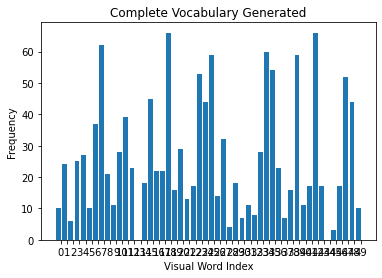

Features histogram plotted.


In [5]:
def extractFeatures(kmeans, descriptor_list, image_count, no_clusters): 
    # Extract Image Features
    im_features = np.array([np.zeros(no_clusters) for i in range(image_count)])
    for i in range(image_count):
        for j in range(len(descriptor_list[i])):
            feature = descriptor_list[i][j] 
            feature = feature.reshape(1, 128)
            idx = kmeans.predict(feature)
            im_features[i][idx] += 1
    return im_features 

im_features = extractFeatures(kmeans, descriptor_list, image_count, no_clusters)
print("Images features extracted.")

scale = StandardScaler().fit(im_features)        
im_features = scale.transform(im_features)
print("Train images normalized.")

plotHistogram(im_features, no_clusters)
print("Features histogram plotted.")


5. Design the SVM for fitting.

In [6]:
def findSVM(im_features, train_labels, kernel):
    features = im_features
    if(kernel == "precomputed"):
        features = np.dot(im_features, im_features.T)
    
    params = svcParamSelection(features, train_labels, kernel, 5)
    C_param, gamma_param = params.get("C"), params.get("gamma")
    print(C_param, gamma_param)
    class_weight = {
        0: (807 / (7 * 140)),
        1: (807 / (7 * 140)),
        2: (807 / (7 * 133)),
        3: (807 / (7 * 70)),
        4: (807 / (7 * 42)),
        5: (807 / (7 * 140)),
        6: (807 / (7 * 142)) 
    }
  
    svm = SVC(kernel=kernel, C= C_param, gamma=gamma_param, class_weight=class_weight)
    # https://scikit-learn.org/stable/modules/svm.html
    svm.fit(features, train_labels)
    return svm

svm = findSVM(im_features, train_labels, kernel)
print("SVM fitted.")
print("Training completed.")

0.1 0.1
SVM fitted.
Training completed.


# Problem 2: Testing
Testing and output the results.

Test images path detected.
Test images classified.
Confusion matrix, without normalization
[[18  0  7  0  2  0  3]
 [ 0 21  4  0  3  0  2]
 [ 6  2 16  2  0  1  3]
 [ 3  0  0 17 10  0  0]
 [ 0  1  2  8 13  6  0]
 [ 1  0  4  7  9  9  0]
 [ 1  4  4  2  2  0 16]]
Normalized confusion matrix
[[0.6  0.   0.23 0.   0.07 0.   0.1 ]
 [0.   0.7  0.13 0.   0.1  0.   0.07]
 [0.2  0.07 0.53 0.07 0.   0.03 0.1 ]
 [0.1  0.   0.   0.57 0.33 0.   0.  ]
 [0.   0.03 0.07 0.27 0.43 0.2  0.  ]
 [0.03 0.   0.13 0.23 0.3  0.3  0.  ]
 [0.03 0.14 0.14 0.07 0.07 0.   0.55]]


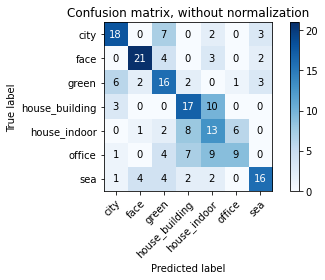

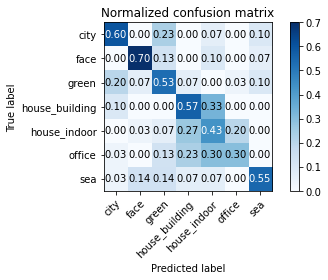

Confusion matrixes plotted.
accuracy score: 0.526
Accuracy calculated.
Execution done.


In [7]:
test_path = './dataset/test/'
test_images = getFiles(False, test_path)
print("Test images path detected.")

count = 0
true = []
descriptor_list = []

name_dict =	{
    "0": "city",
    "1": "face",
    "2": "green",
    "3": "house_building",
    "4": "house_indoor",
    "5": "office",
    "6": "sea"
}

sift = cv2.SIFT_create()

for img_path in test_images:
    img = readImage(img_path)
    des = getDescriptors(sift, img)

    if(des is not None):
        count += 1
        descriptor_list.append(des)

        if("city" in img_path):
            true.append("city")
        elif("face" in img_path):
            true.append("face")
        elif("green" in img_path):
            true.append("green")
        elif("house_building" in img_path):
            true.append("house_building")
        elif("house_indoor" in img_path):
            true.append("house_indoor")
        elif("office" in img_path):
            true.append("office")
        else:
            true.append("sea")

descriptors = vstackDescriptors(descriptor_list)

test_features = extractFeatures(kmeans, descriptor_list, count, no_clusters)

test_features = scale.transform(test_features)

kernel_test = test_features
if(kernel == "precomputed"):
    kernel_test = np.dot(test_features, im_features.T)

predictions = [name_dict[str(int(i))] for i in svm.predict(kernel_test)]
print("Test images classified.")

plotConfusions(true, predictions)
print("Confusion matrixes plotted.")

findAccuracy(true, predictions)
print("Accuracy calculated.")
print("Execution done.")